Library Generation - part 1
1. Bring in the target compound and fragment smiles (samples)
2. Code the scaffolding (Mucko), then add and replace fragments
3. SMILES validation
4. Export SMILES

In [29]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Scaffolds import MurckoScaffold
IPythonConsole.ipython_useSVG=False#< set this to False if you want PNGs instead of SVGs
Chem.Draw.DrawingOptions.includeAtomNumbers=True

In [44]:
def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()+1))
    return mol

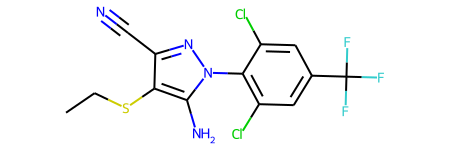

In [105]:
#5-Amino-1-[2,6-dichloro-4-(trifluoromethyl)phenyl]-4-(ethylthio)-1H-pyrazole-3-carbonitrile

target_pest = "CCSC1=C(N)N(N=C1C#N)C1=C(Cl)C=C(C=C1Cl)C(F)(F)F"
molT2 = Chem.MolFromSmiles(target_pest)
molT2

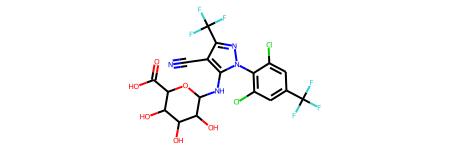

In [120]:
#Biotransformer only gave 1 phase2 transformation
target_pest_bio = "N(C1=C(C#N)C(=NN1C2=C(Cl)C=C(C=C2Cl)C(F)(F)F)C(F)(F)F)C3OC(C(O)C(O)C3O)C(O)=O"
molT2b = Chem.MolFromSmiles(target_pest_bio)
molT2b

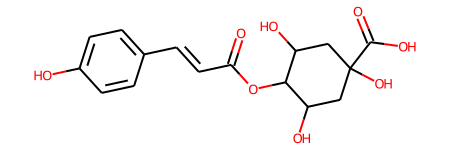

In [106]:
# temp data upload
fragments = ["S1C=CC=C1", "CCBr", "C(=O)O"]
target_kay = "C1C(C(C(CC1(C(=O)O)O)O)OC(=O)C=CC2=CC=C(C=C2)O)O"
molT = Chem.MolFromSmiles(target_kay)
molT

Rearranging Graphs

In [ ]:
### create algorithm to change bonding atom index ###

Replacing Graph R-Groups by Rearrangement

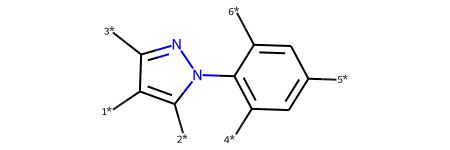

In [108]:
core = MurckoScaffold.GetScaffoldForMol(molT2)
tempc = Chem.ReplaceSidechains(molT2, core)
tempcs = Chem.MolToSmiles(tempc)
tempc

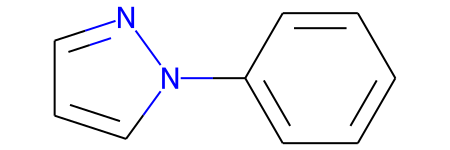

In [109]:
core

In [110]:
core2 = MurckoScaffold.GetScaffoldForMol(molT2)
tempc2 = Chem.ReplaceCore(molT2, core2,  labelByIndex=True)
tempcs2 = Chem.MolToSmiles(tempc2)
frag2 = tempcs2.strip().split(".")
frag3 = []
for i in frag2:
    i = i.replace("*", "")
    if "]" in i:
        frag3.append(i.strip().split("]")[1])
    else:
        frag3.append(i.strip())

frag3

['SCC', 'N', 'Cl', 'C#N', 'Cl', 'C(F)(F)F']

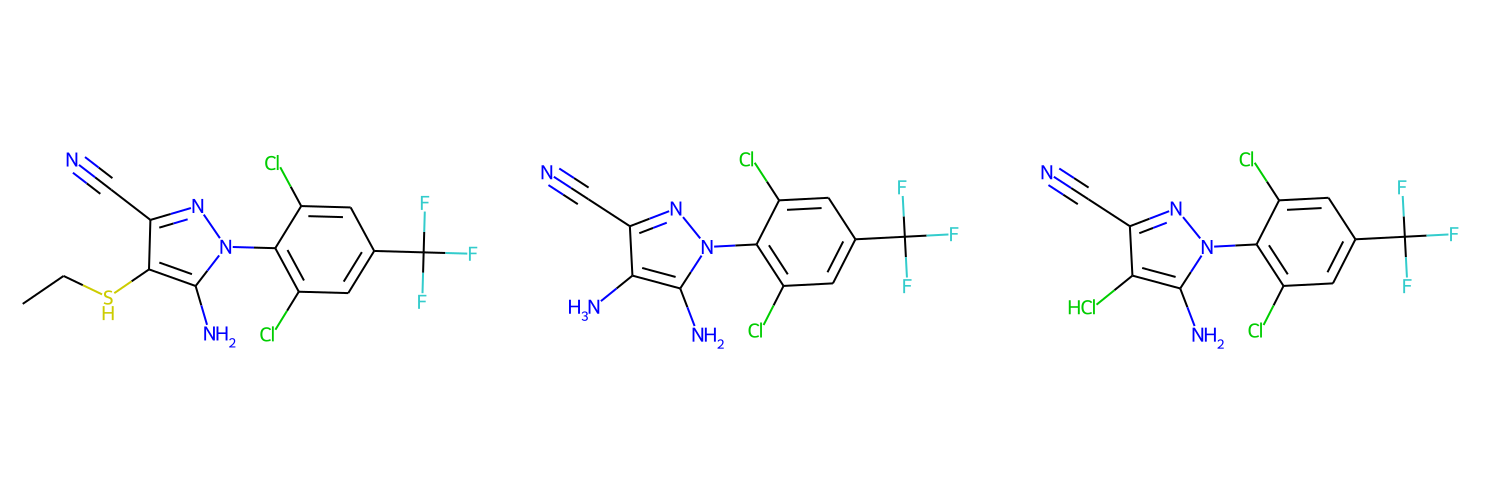

In [113]:
molT2 = Chem.MolFromSmiles(target_pest)
moll = []
for i, s1 in enumerate(frag3):
    for j, s2 in enumerate(frag3):
        mod_mol = Chem.ReplaceSubstructs(molT2,
                                 Chem.MolFromSmiles(s1),
                                 Chem.MolFromSmiles(s2),
                                 replaceAll=False)
        if mod_mol[0] is None:
            pass
        else:
            moll.append(mod_mol[0])


mol_show = Draw.MolsToGridImage(moll[:3], molsPerRow=3, subImgSize=(500, 500),
                                           returnPNG=False)
mol_show



Replacing Graph R Groups with ChemLife Fragments

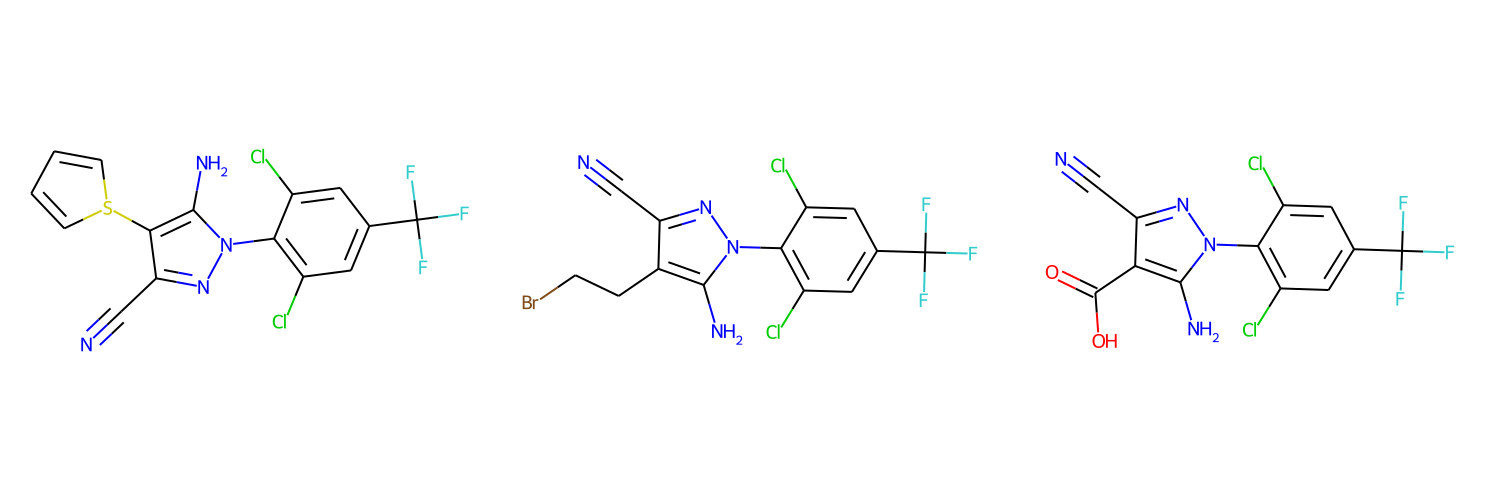

In [118]:
fragments = ["S1C=CC=C1", "CCBr", "C(=O)O"]
molT2 = Chem.MolFromSmiles(target_pest)
moll = []
for i, s1 in enumerate(frag3):
    for j, s2 in enumerate(fragments):
        mod_mol = Chem.ReplaceSubstructs(molT2,
                                 Chem.MolFromSmiles(s1),
                                 Chem.MolFromSmiles(s2),
                                 replaceAll=False)
        if mod_mol[0] is None:
            pass
        else:
            moll.append(mod_mol[0])


mol_show = Draw.MolsToGridImage(moll[:3], molsPerRow=3, subImgSize=(500, 500),
                                           returnPNG=False)
mol_show

Rearranging SMILES Atoms

In [91]:
import random

def randomSmiles(m1):
    m1.SetProp("_canonicalRankingNumbers", "True")
    idxs = list(range(0,m1.GetNumAtoms()))
    #random.shuffle(idxs)
    #print("randomshuff: " + str(idxs))
    idxss = fisher_yates_shuffle(idxs)
    #print("fyshuffle: " + str(idxss))
    for i,v in enumerate(idxss):
        m1.GetAtomWithIdx(i).SetProp("_canonicalRankingNumber", str(v))
    return Chem.MolToSmiles(m1)


def fisher_yates_shuffle(test_list):
    for i in range(len(test_list)-1, 0, -1):
        # Pick a random index from 0 to i
        j = random.randint(0, i)
        # Swap arr[i] with the element at random index
        test_list[i], test_list[j] = test_list[j], test_list[i]
    return test_list

# target_kay = "CCSC1=C(N)N(N=C1C#N)C1=C(Cl)C=C(C=C1Cl)C(F)(F)F"
# m1 = Chem.MolFromSmiles(target_kay)
# s = set()
# for i in range(1000):
#   smiles = randomSmiles(m1)
#   s.add(smiles)
#
# print(s)


target_kay = "CCSC1=C(N)N(N=C1C#N)C1=C(Cl)C=C(C=C1Cl)C(F)(F)F"

mole = []
smiles = []
count = 0
while count <= 10:
    smile = randomize_smiles(target_kay)
    mol = Chem.MolFromSmiles(smile)
    smiles.append(smile)
    mole.append(mol)
    count += 1

mol_show = Draw.MolsToGridImage(mole, molsPerRow=3, subImgSize=(500, 500),
                                            returnPNG=False)

mol_show

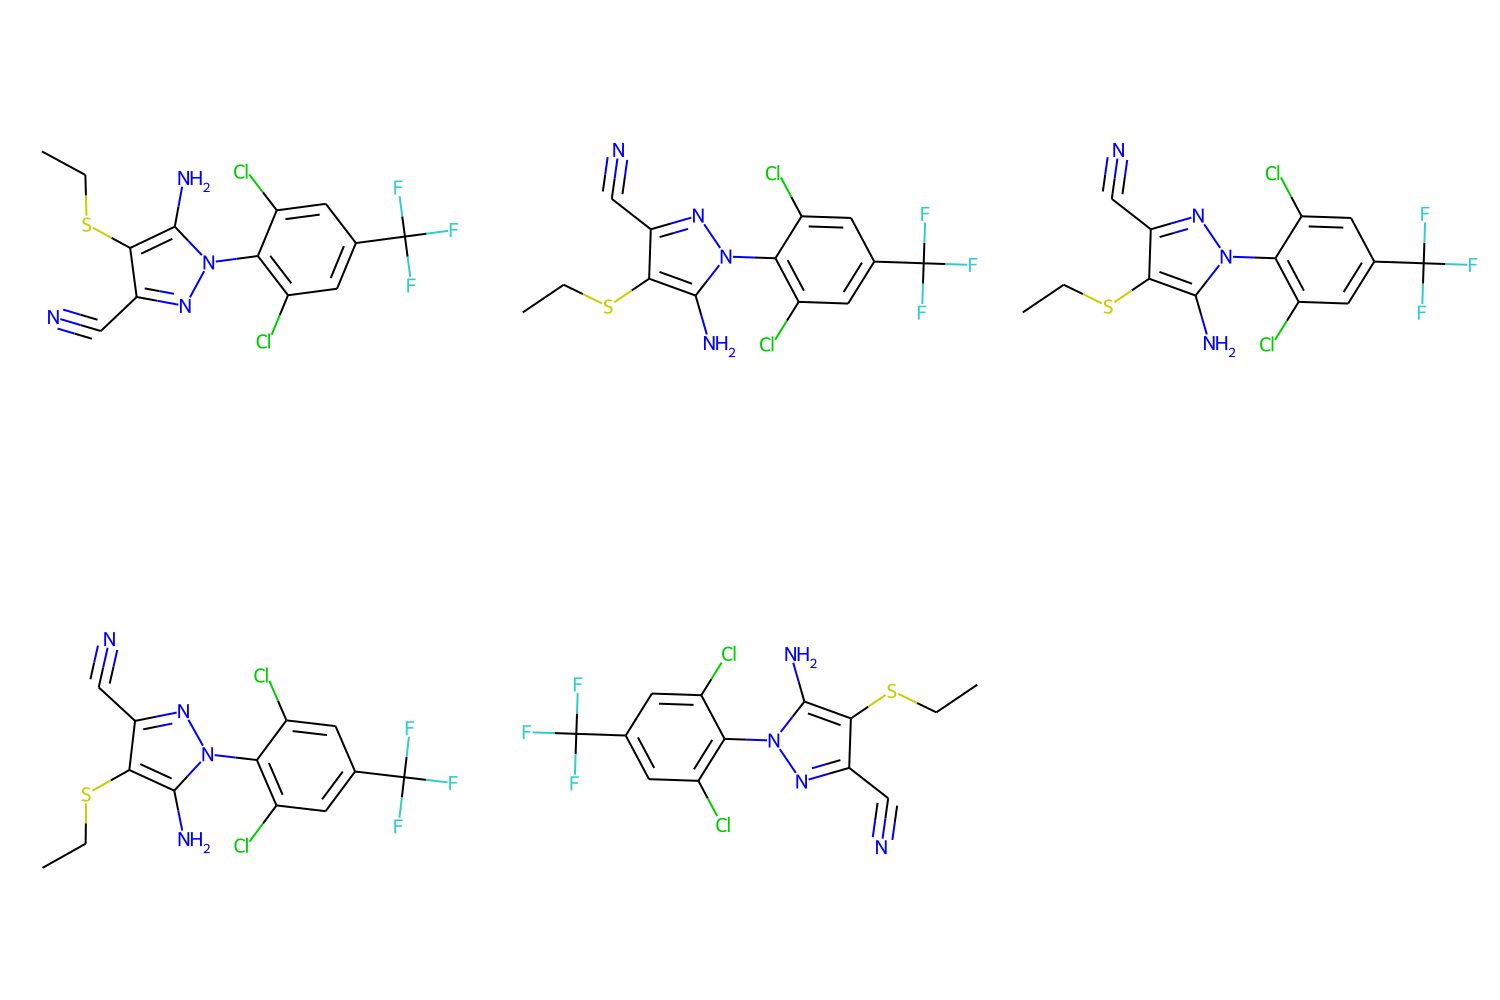

In [117]:
target_kay = "CCSC1=C(N)N(N=C1C#N)C1=C(Cl)C=C(C=C1Cl)C(F)(F)F"
#target_kay = "CNC1CCC(C2=CC=CC=C12)C3=CC(=C(C=C3)Cl)Cl"
m2 = Chem.MolFromSmiles(target_kay)
#print(set(randomSmiles(m2) for x in range(1000)))


mole = []
smiless = []
count = 0

for i in range(5):
    smiles = randomSmiles(m2)
    smiless.append(smiles)
    m = Chem.MolFromSmiles(smiles,sanitize=False)
    if m is None:
        pass
    else:
        mole.append(m)

mol_show = Draw.MolsToGridImage(mole[:6], molsPerRow=3, subImgSize=(500, 500),
                                            returnPNG=False)
mol_show